<a href="https://colab.research.google.com/github/jubymariajoseph/DSA-Activities/blob/main/classification_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("/content/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
df.duplicated().sum()

np.int64(240)

In [7]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
num_cols = df.select_dtypes('float64')
num_cols

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


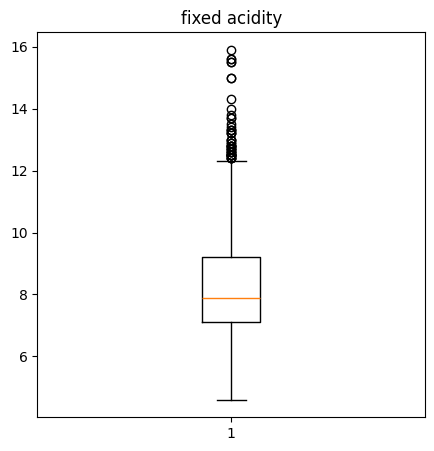

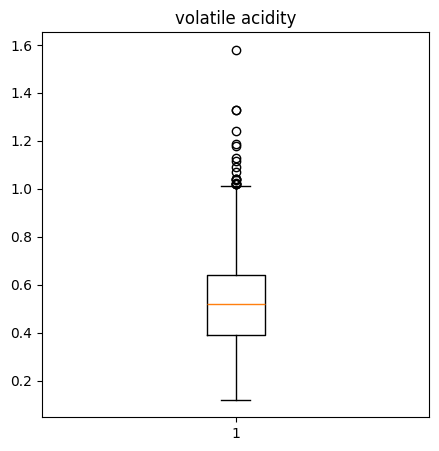

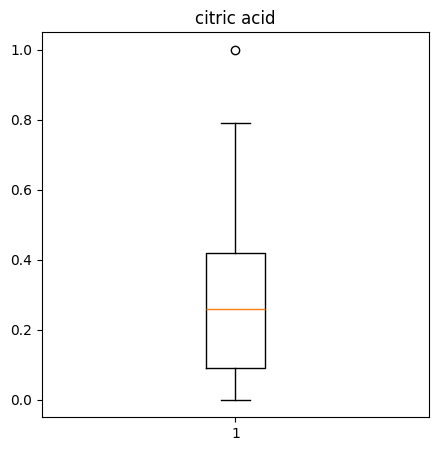

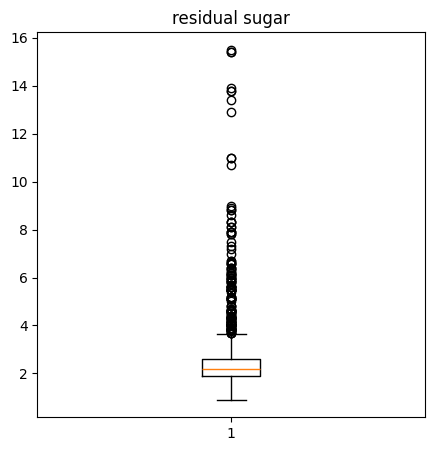

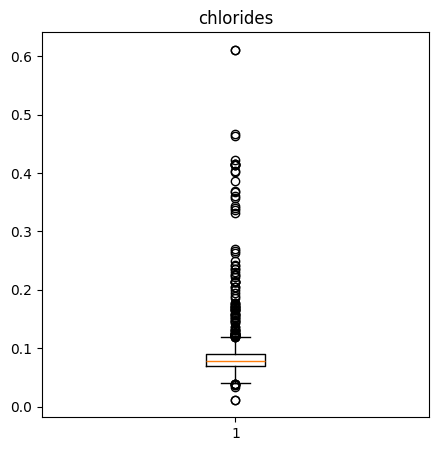

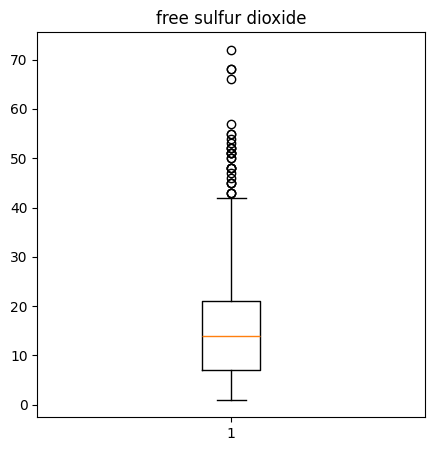

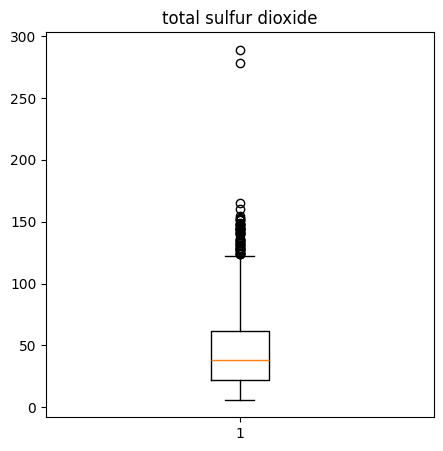

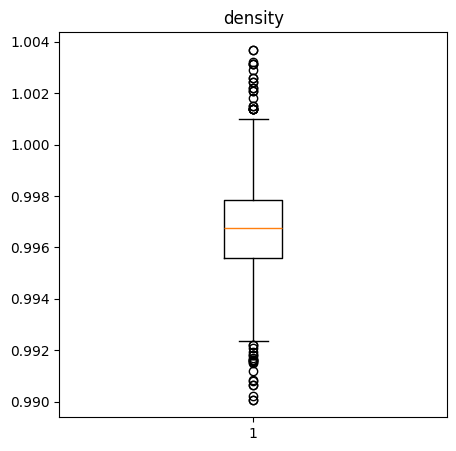

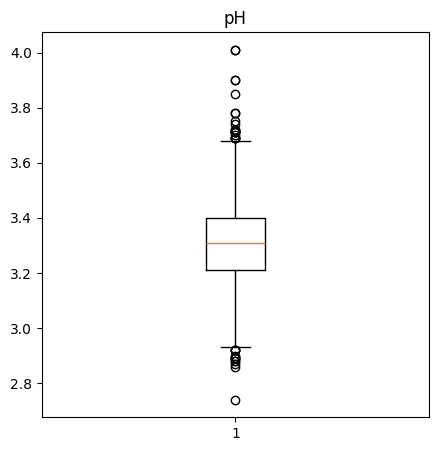

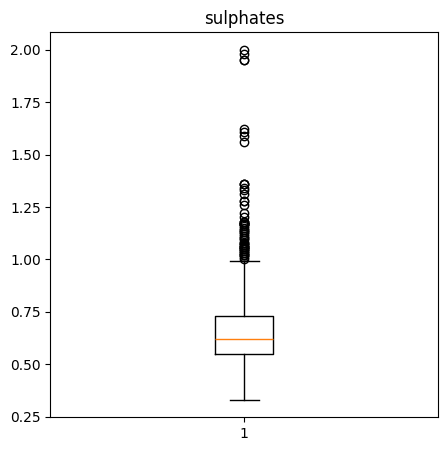

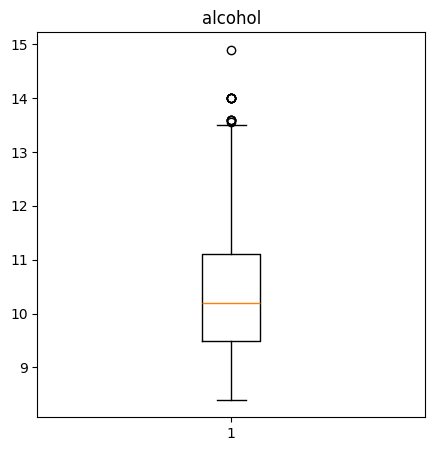

In [9]:
for i in num_cols:
  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.boxplot(num_cols[i])

In [10]:
fixed = df['fixed acidity'].values
winsorize1 = winsorize(fixed,limits=(0.01,0.02))
df['fixed acidity'] = winsorize1

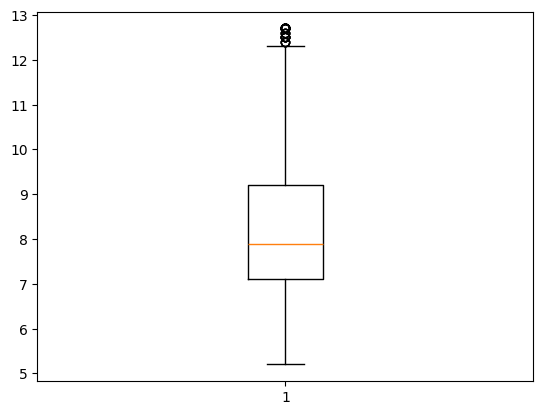

In [11]:
plt.boxplot(df['fixed acidity']);

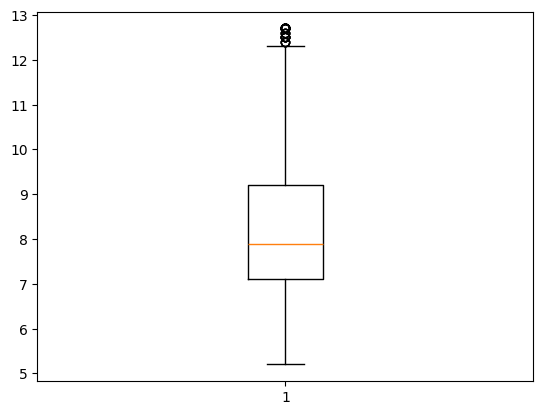

In [12]:
volatile = df['volatile acidity'].values
winsorize2 = winsorize(volatile,limits=(0.01,0.02))
df['volatile acidity'] = winsorize2
plt.boxplot(df['fixed acidity']);

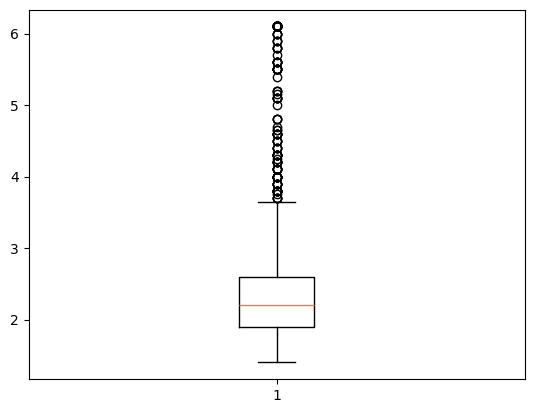

In [13]:
residual = df['residual sugar'].values
winsorize3 = winsorize(residual,limits=(0.01,0.03))
df['residual sugar'] = winsorize3
plt.boxplot(df['residual sugar']);

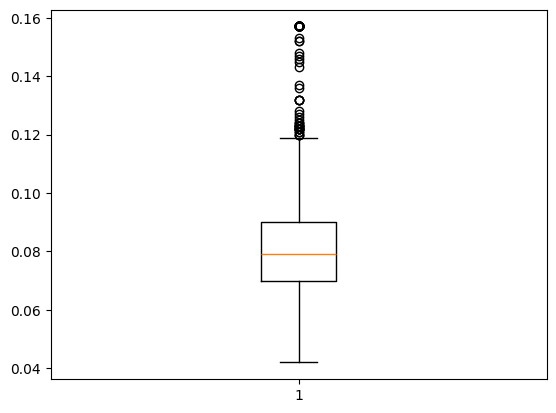

In [14]:
ch = df['chlorides'].values
winsorize4 = winsorize(ch,limits=(0.01,0.04))
df['chlorides'] = winsorize4
plt.boxplot(df['chlorides']);

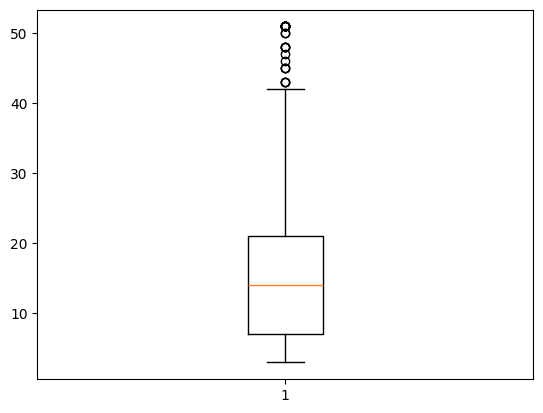

In [15]:
free = df['free sulfur dioxide'].values
winsorize5 = winsorize(free,limits=(0.01,0.01))
df['free sulfur dioxide'] = winsorize5
plt.boxplot(df['free sulfur dioxide']);

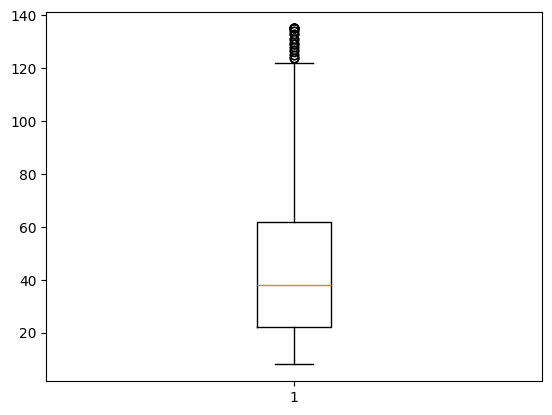

In [16]:
sulphur = df['total sulfur dioxide'].values
winsorize6 = winsorize(sulphur,limits=(0.01,0.02))
df['total sulfur dioxide'] = winsorize6
plt.boxplot(df['total sulfur dioxide']);

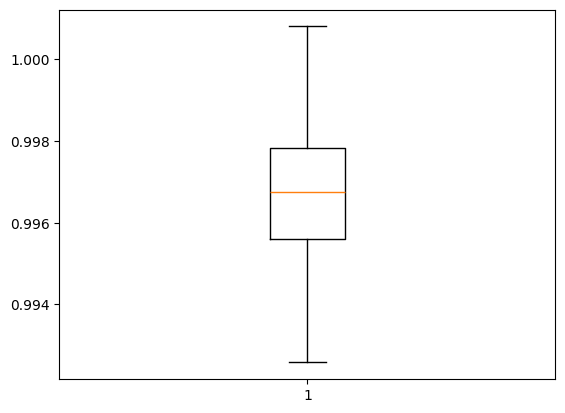

In [17]:
density = df['density'].values
winsorize7 = winsorize(density,limits=(0.02,0.02))
df['density'] = winsorize7
plt.boxplot(df['density']);

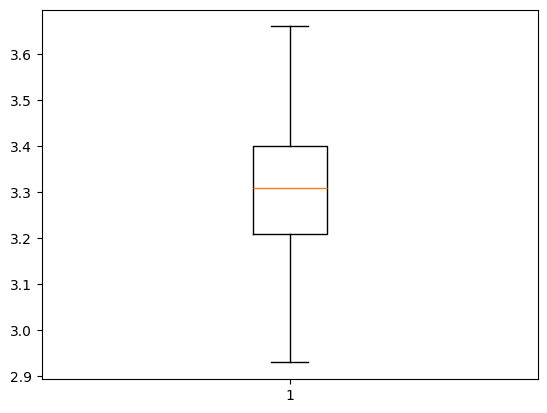

In [18]:
ph = df['pH'].values
winsorize8 = winsorize(ph,limits=(0.01,0.02))
df['pH'] = winsorize8
plt.boxplot(df['pH']);

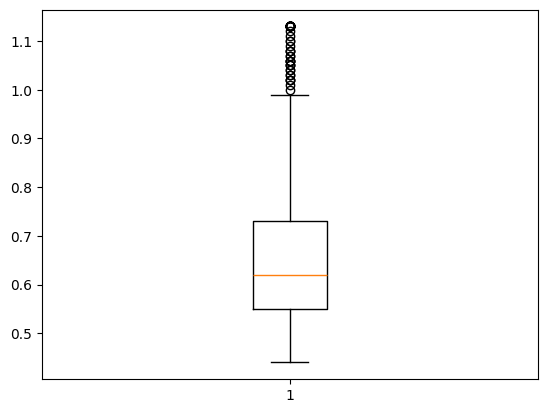

In [19]:
sul = df['sulphates'].values
winsorize9 = winsorize(sul,limits=(0.02,0.02))
df['sulphates'] = winsorize9
plt.boxplot(df['sulphates']);

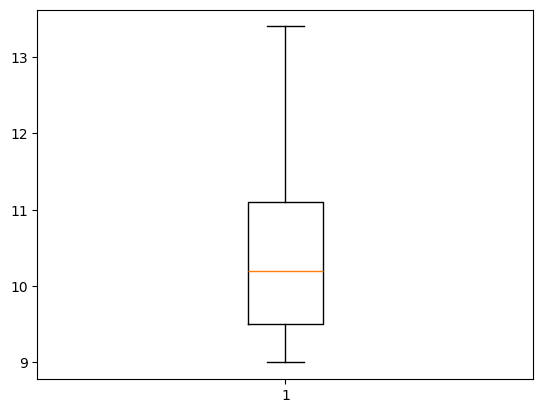

In [20]:
al = df['alcohol'].values
winsorize10 = winsorize(al,limits=(0.01,0.01))
df['alcohol'] = winsorize10
plt.boxplot(df['alcohol']);

In [21]:
num_cols1 = df.select_dtypes('float64')

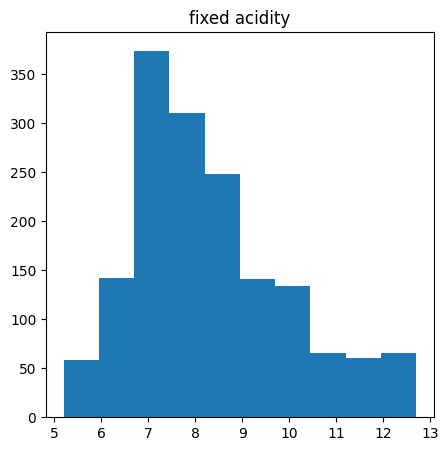

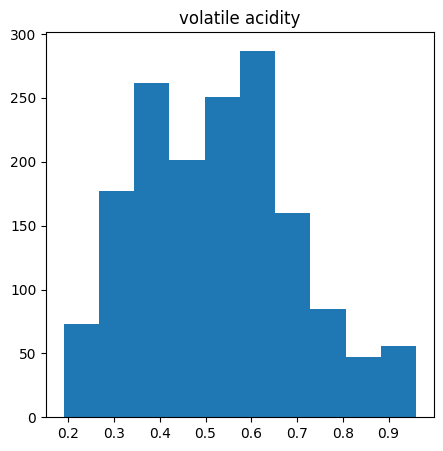

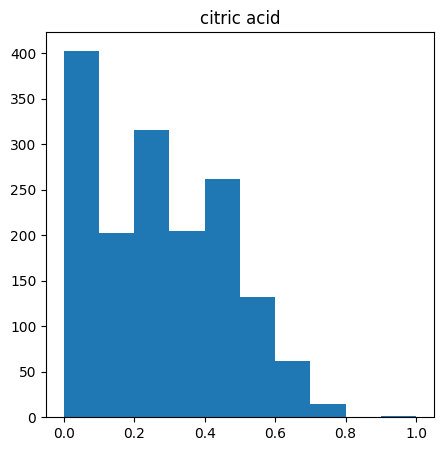

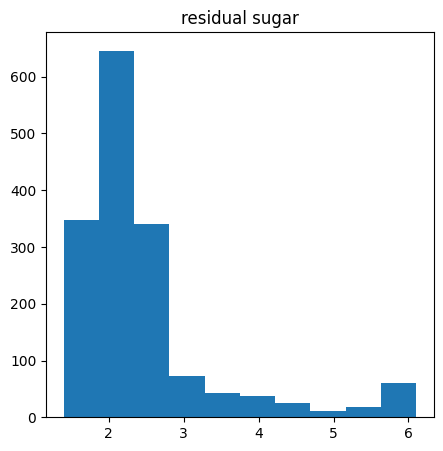

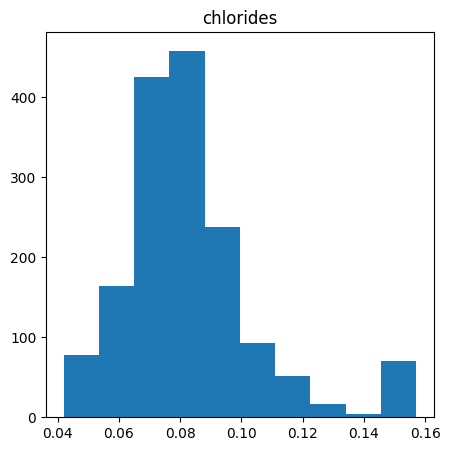

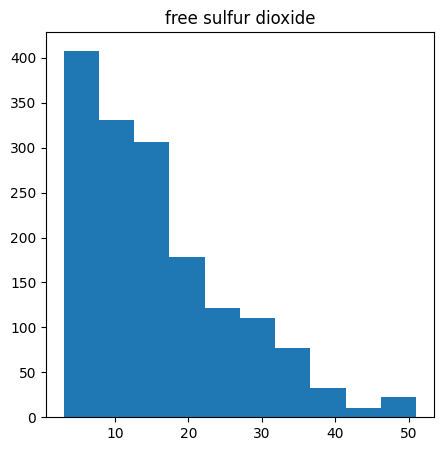

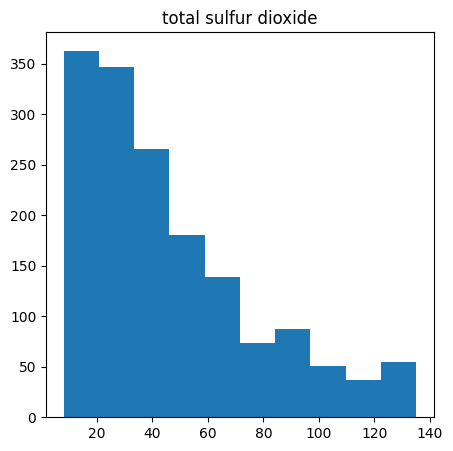

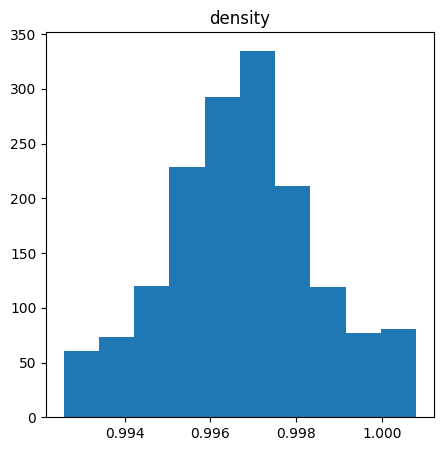

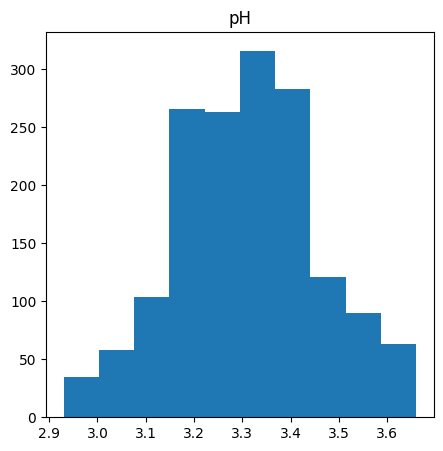

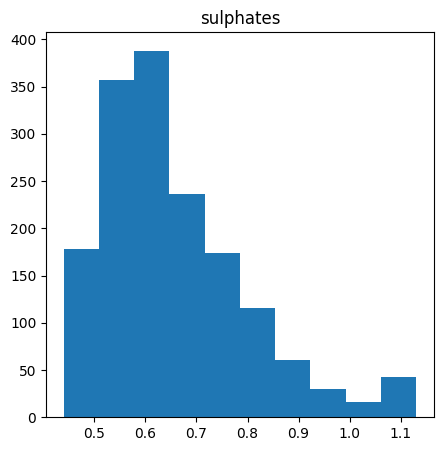

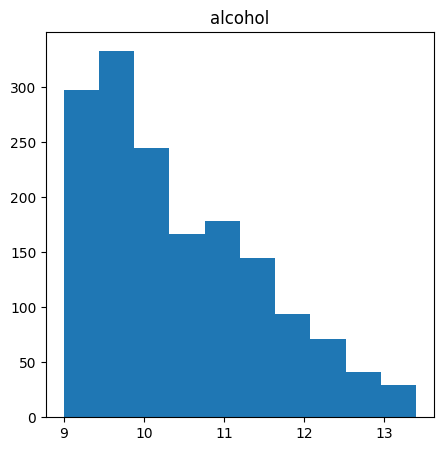

In [22]:
for i in num_cols1:
  plt.figure(figsize=(5,5))
  plt.title(i)
  plt.hist(num_cols1[i])

In [23]:
minmax =MinMaxScaler()
df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide',
    'sulphates','alcohol']]=minmax.fit_transform(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                                                     'free sulfur dioxide','total sulfur dioxide','sulphates',
                                                     'alcohol']])

In [24]:
std = StandardScaler()
df[['density','pH']] = std.fit_transform(df[['density','pH']])

In [25]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.268902,0.678465,0.145097,0.187538,-0.153765,-0.116112,0.667783,-0.688025,0.205007,-0.063562,0.126163
volatile acidity,-0.268902,1.000000,-0.564435,0.033493,0.119767,-0.006109,0.091859,0.016607,0.236392,-0.295269,-0.212402,-0.386327
citric acid,0.678465,-0.564435,1.000000,0.162824,0.160155,-0.060251,0.022943,0.370025,-0.546971,0.330955,0.114182,0.226373
residual sugar,0.145097,0.033493,0.162824,1.000000,0.124720,0.121549,0.172992,0.360875,-0.083280,0.025081,0.096227,0.023091
chlorides,0.187538,0.119767,0.160155,0.124720,1.000000,0.000687,0.083406,0.344339,-0.258470,0.194195,-0.278391,-0.172702
free sulfur dioxide,-0.153765,-0.006109,-0.060251,0.121549,0.000687,1.000000,0.678887,-0.025568,0.073911,0.048537,-0.070815,-0.050257
total sulfur dioxide,-0.116112,0.091859,0.022943,0.172992,0.083406,0.678887,1.000000,0.096060,-0.058323,0.010904,-0.229041,-0.201354
density,0.667783,0.016607,0.370025,0.360875,0.344339,-0.025568,0.096060,1.000000,-0.334364,0.156693,-0.499330,-0.176226
pH,-0.688025,0.236392,-0.546971,-0.083280,-0.258470,0.073911,-0.058323,-0.334364,1.000000,-0.159921,0.190689,-0.062604
sulphates,0.205007,-0.295269,0.330955,0.025081,0.194195,0.048537,0.010904,0.156693,-0.159921,1.000000,0.131754,0.300090


In [26]:
label = LabelEncoder()
df['quality'] = label.fit_transform(df['quality'])

In [27]:
y = df['quality']
x = df.drop(['quality'],axis=1)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state=42)

In [29]:
log_model1 = LogisticRegression()
log_model1.fit(x_train,y_train)
y_pred = log_model1.predict(x_test)

In [30]:
print("Accuracy score is",accuracy_score(y_test,y_pred))
print("Presicion score is",precision_score(y_test,y_pred,average ='weighted'))
print("Recall score is",recall_score(y_test,y_pred,average ='weighted'))
print("f1 score is",f1_score(y_test,y_pred,average ='weighted'))

Accuracy score is 0.584375
Presicion score is 0.5442134853069389
Recall score is 0.584375
f1 score is 0.553544348158532


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  7,  3,  0,  0],
       [ 0,  0, 99, 31,  0,  0],
       [ 0,  0, 46, 80,  6,  0],
       [ 0,  0,  2, 32,  8,  0],
       [ 0,  0,  0,  2,  3,  0]])

In [32]:
metric_k = []
neighbours = np.arange(3,15)

In [33]:
for k in neighbours:
  classifier = KNeighborsClassifier(n_neighbors = k, metric ='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred1 = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred1)
  metric_k.append(acc)

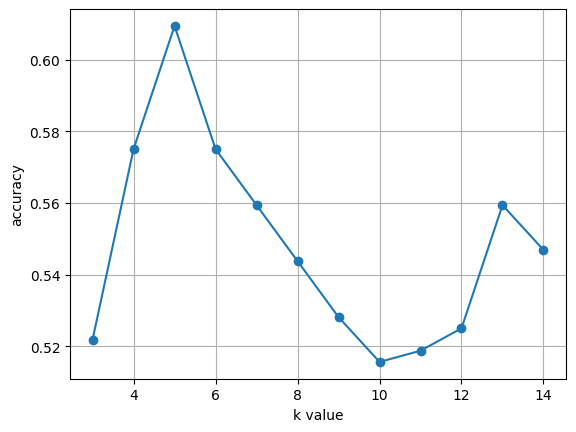

In [34]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [35]:
classifier1 = KNeighborsClassifier(n_neighbors =5,metric ='minkowski',p=2)
classifier1.fit(x_train,y_train)
y_pred2 = classifier1.predict(x_test)
print("Accuracy score is",accuracy_score(y_test,y_pred2))
print("Presicion score is",precision_score(y_test,y_pred2, average='weighted'))
print("Recall score is",recall_score(y_test,y_pred2, average='weighted'))
print("f1 score is",f1_score(y_test,y_pred2, average='weighted'))
confusion_matrix(y_test, y_pred2)

Accuracy score is 0.609375
Presicion score is 0.5790082556147697
Recall score is 0.609375
f1 score is 0.5904740021008402


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  4,  6,  0,  0],
       [ 0,  0, 95, 34,  1,  0],
       [ 0,  1, 36, 85,  9,  1],
       [ 0,  0,  7, 20, 15,  0],
       [ 0,  0,  0,  2,  3,  0]])